<a href="https://colab.research.google.com/github/jkoks-svg/ML_Project_ENSAE/blob/main/ML_Project_ENSAE_Anushkav2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting up the notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install required libraries
!pip install ucimlrepo #Fetch datasets from the UCI Machine Learning Repository
!pip install doubleml #Implements Double Machine Learning (DML) for causal inference using machine learning
!pip install xgboost # #A powerful gradient boosting framework for classification and regression tasks
!pip install seaborn #A statistical data visualization library for creating informative and attractive graphics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.9/342.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
# Import the 'files' module from Google Colab to handle file uploads
from google.colab import files
uploaded = files.upload()

Saving declarations.py to declarations.py


In [45]:
# Import des packages
from importlib import reload
import declarations as d #Importing a custom module named 'declarations' as 'd'
reload(d)

<module 'declarations' from '/content/declarations.py'>

# Import necessary libraries

In [46]:
# Fundamental scientific computing libraries
import numpy as np  # Provides support for large, multi-dimensional arrays and matrices
import pandas as pd  # Used for data manipulation and analysis

# Double Machine Learning (DML) for causal inference
import doubleml as dml  # Implements DoubleML methods for causal machine learning

# Scikit-learn: Machine learning and preprocessing utilities
from sklearn.preprocessing import PolynomialFeatures  # Generates polynomial feature combinations
from sklearn.linear_model import LassoCV, LogisticRegressionCV  # Lasso regression with cross-validation and logistic regression with cross-validation
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Random Forest models for classification and regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # Decision Tree models for classification and regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Standardizes features (scaling) and encodes categorical variables
from sklearn.pipeline import make_pipeline  # Simplifies workflow creation with preprocessing and model steps
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets

# XGBoost: Optimized gradient boosting library
from xgboost import XGBClassifier, XGBRegressor  # XGBoost models for classification and regression

# Data visualization libraries
import matplotlib.pyplot as plt  # Standard plotting library
import seaborn as sns  # Enhances visualization capabilities with statistical plots


# Set notebook styling for better visuals

In [8]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset

In [47]:
# Import dataset
df=d.fetch_ucirepo(id=697)
X=df.data.features
y = df.data.targets
df = d.pd.concat([X, y], axis=1)
X.head() # Display the first few rows of the dataset to get an overview

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


# Description of key variables in the dataset

In [38]:
# Print dataset description
print("Dataset Description:")

# Dictionary containing descriptions of dataset features
dataset_description = {
    "Target": "Student status: Graduate, Dropout, or Enrolled",
    "Course": "Study program the student is enrolled in",
    "Age at enrollment": "Age of the student at the time of enrollment",
    "Gender": "Binary indicator (0 = Male, 1 = Female)",
    "Scholarship holder": "Binary indicator for receiving a scholarship (0 = No, 1 = Yes)",
    "Tuition fees up to date": "Indicator if tuition fees are paid (0 = No, 1 = Yes)",
    "Debtor": "Indicator if the student has outstanding debts (0 = No, 1 = Yes)",
    "Admission grade": "Grade obtained at admission",
    "Previous qualification": "Previous academic qualification of the student",
    "Previous qualification grade": "Grade obtained in the previous qualification",
    "Displaced": "Indicator if the student is displaced (0 = No, 1 = Yes)",
    "Educational special needs": "Indicator for special education needs (0 = No, 1 = Yes)",
    "International": "Indicator if the student is international (0 = No, 1 = Yes)",
    "Mother's qualification": "Educational qualification of the student's mother",
    "Father's qualification": "Educational qualification of the student's father",
    "Mother's occupation": "Occupation of the student's mother",
    "Father's occupation": "Occupation of the student's father",
    "Unemployment rate": "Unemployment rate in the country during enrollment",
    "GDP growth rate": "GDP growth rate at the time of enrollment",
    "Inflation rate": "Inflation rate at the time of enrollment"
}
# Loop through the dictionary and print each feature's description
for var, desc in dataset_description.items():
    print(f"{var}: {desc}")

Dataset Description:
Target: Student status: Graduate, Dropout, or Enrolled
Course: Study program the student is enrolled in
Age at enrollment: Age of the student at the time of enrollment
Gender: Binary indicator (0 = Male, 1 = Female)
Scholarship holder: Binary indicator for receiving a scholarship (0 = No, 1 = Yes)
Tuition fees up to date: Indicator if tuition fees are paid (0 = No, 1 = Yes)
Debtor: Indicator if the student has outstanding debts (0 = No, 1 = Yes)
Admission grade: Grade obtained at admission
Previous qualification: Previous academic qualification of the student
Previous qualification grade: Grade obtained in the previous qualification
Displaced: Indicator if the student is displaced (0 = No, 1 = Yes)
Educational special needs: Indicator for special education needs (0 = No, 1 = Yes)
International: Indicator if the student is international (0 = No, 1 = Yes)
Mother's qualification: Educational qualification of the student's mother
Father's qualification: Educational qua

# Check for missing values in the dataset

In [12]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


The Series([], dtype: int64) indicates that the missing_values Series is empty. This means there are no missing values in any of the dataset columns. Thus, no missing value imputation is needed (e.g., filling with mean/median/mode or dropping rows) and the dataset is clean and ready for preprocessing or model training.

In [13]:
print(df.describe()) #summary statistics for numerical columns in the dataset

       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

The data consists of 4424 observations and is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal. We use Target as our outcome variable, Y, in our analysis.

# Visualization of the Target variable distribution

<ipython-input-14-f82cfa439284>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Target", data=df, palette="pastel")


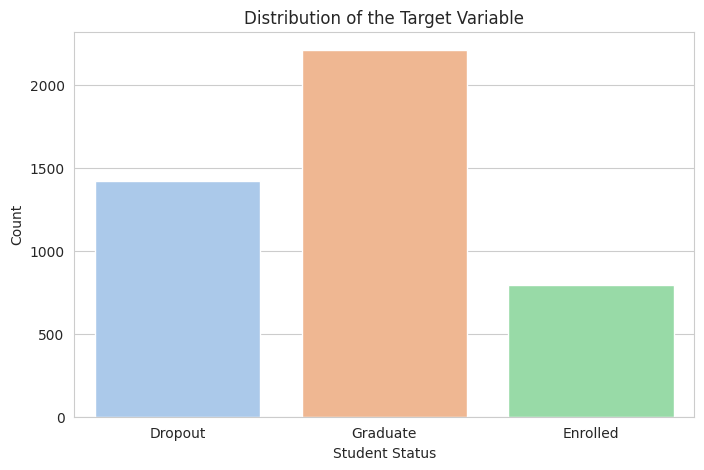

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Target", data=df, palette="pastel")
plt.title("Distribution of the Target Variable")
plt.xlabel("Student Status")
plt.ylabel("Count")
plt.show()

# Visualizing dropout rates across different study programs

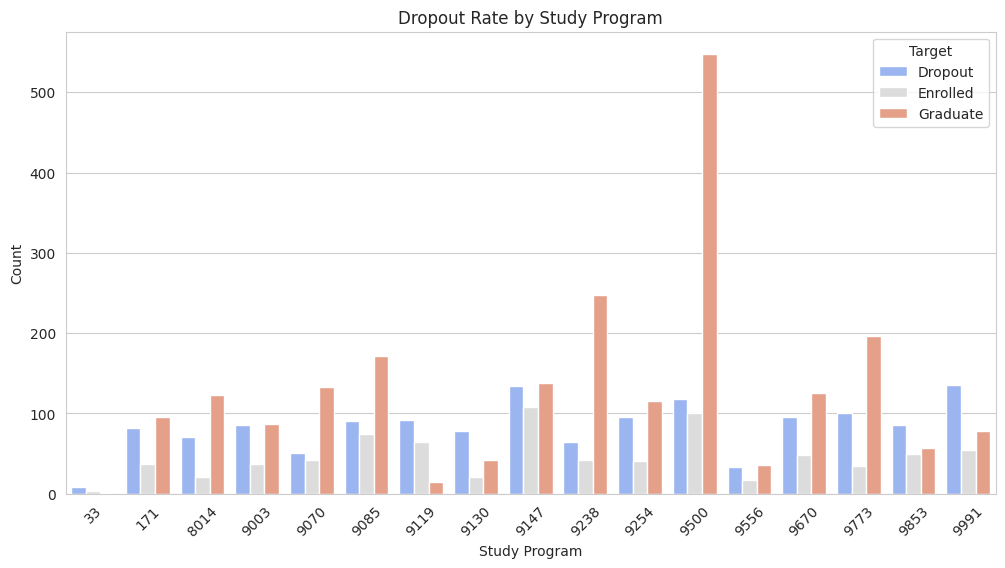

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Course", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate by Study Program")
plt.xlabel("Study Program")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The analysis shows varying dropout rates across study programs. Program 9500  has the highest graduation rate, while others show a balance or higher dropout numbers.

# Boxplot to compare admission grades across student statuses

<ipython-input-17-825b7e581abd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")


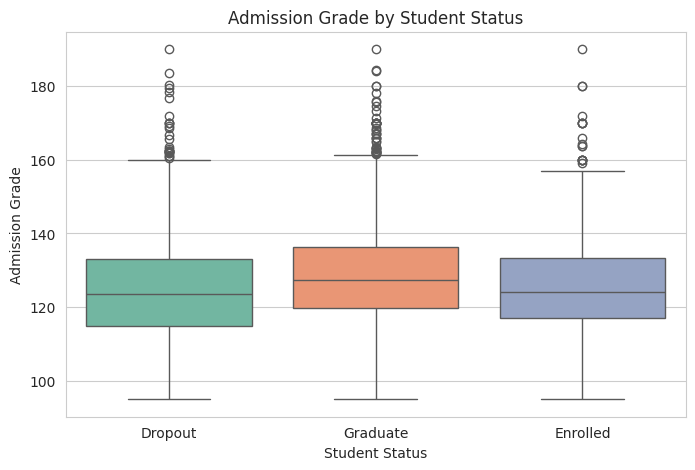

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")
plt.title("Admission Grade by Student Status")
plt.xlabel("Student Status")
plt.ylabel("Admission Grade")
plt.show()

<ipython-input-18-58a9abe3dfb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Target", y="Admission grade", data=df, palette="muted")


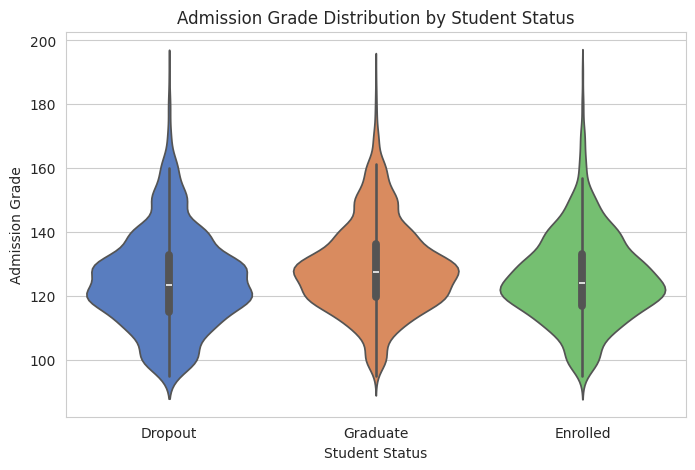

In [18]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Target", y="Admission grade", data=df, palette="muted")
plt.title("Admission Grade Distribution by Student Status")
plt.xlabel("Student Status")
plt.ylabel("Admission Grade")
plt.show()

The boxplots show that graduates tend to have slightly higher admission grades than dropouts and enrolled students, with dropouts having a lower first quartile (Q1), suggesting weaker academic preparation may contribute to dropouts. However, the overlap in distributions indicates that admission grades alone are not a perfect predictor of student outcomes. While dropouts have a wider spread, all three groups share a significant number of high-grade outliers, implying that other factors, such as scholarship status and gender, may play a role.

# Comparing dropout rates among scholarship holders and non-holders

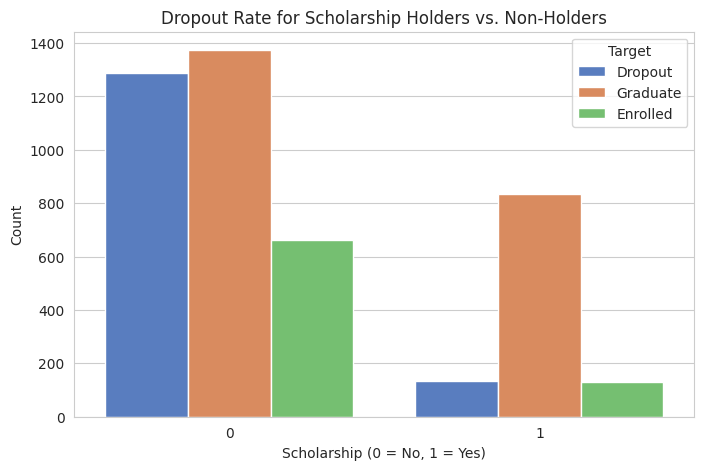

In [24]:
#count plot to show the number of students in each category based on scholarship status
plt.figure(figsize=(8, 5))
sns.countplot(x="Scholarship holder", hue="Target", data=df, palette="muted")
plt.title("Dropout Rate for Scholarship Holders vs. Non-Holders")
plt.xlabel("Scholarship (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

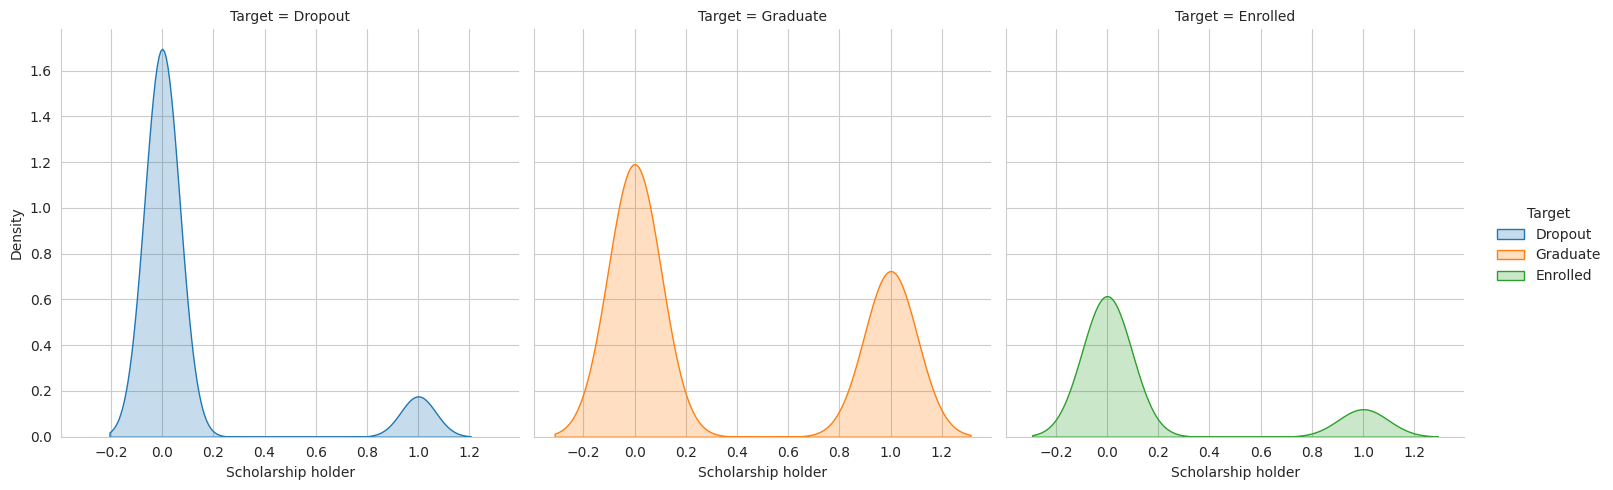

In [22]:
#KDE (Kernel Density Estimate) plot for scholarship holders by student status
_ = sns.displot(df, x="Scholarship holder", hue="Target", col="Target",
                kind="kde", fill=True)

The graphs indicate that students **without scholarships (0) have significantly higher dropout rates** compared to those who receive financial aid. Among non-scholarship holders, dropout and graduation numbers are nearly equal, while for scholarship recipients (1), graduation numbers far exceed dropouts. This suggests that financial aid plays a crucial role in **reducing dropout rates and increasing graduation success**. Additionally, the number of enrolled students is higher among those without scholarships, which could indicate delayed graduation or a higher risk of future dropouts. Overall, scholarships appear to have a **positive impact on student retention and academic success**, supporting the idea that financial assistance helps students complete their studies.

# Comparing dropout rates among gender

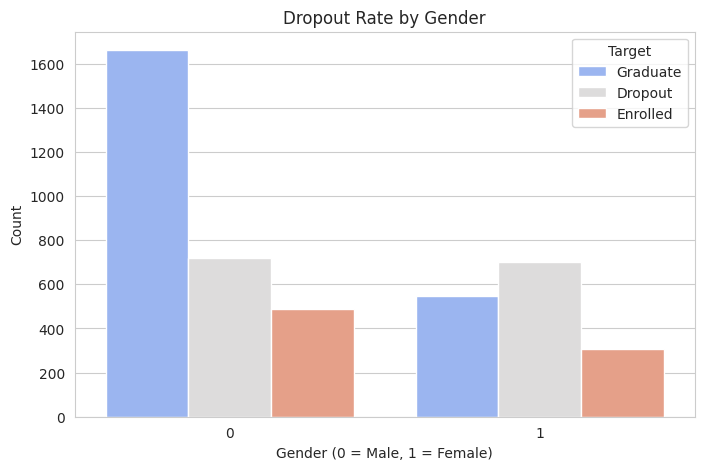

In [27]:
#count plot to show the number of students in each category based on gender
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()

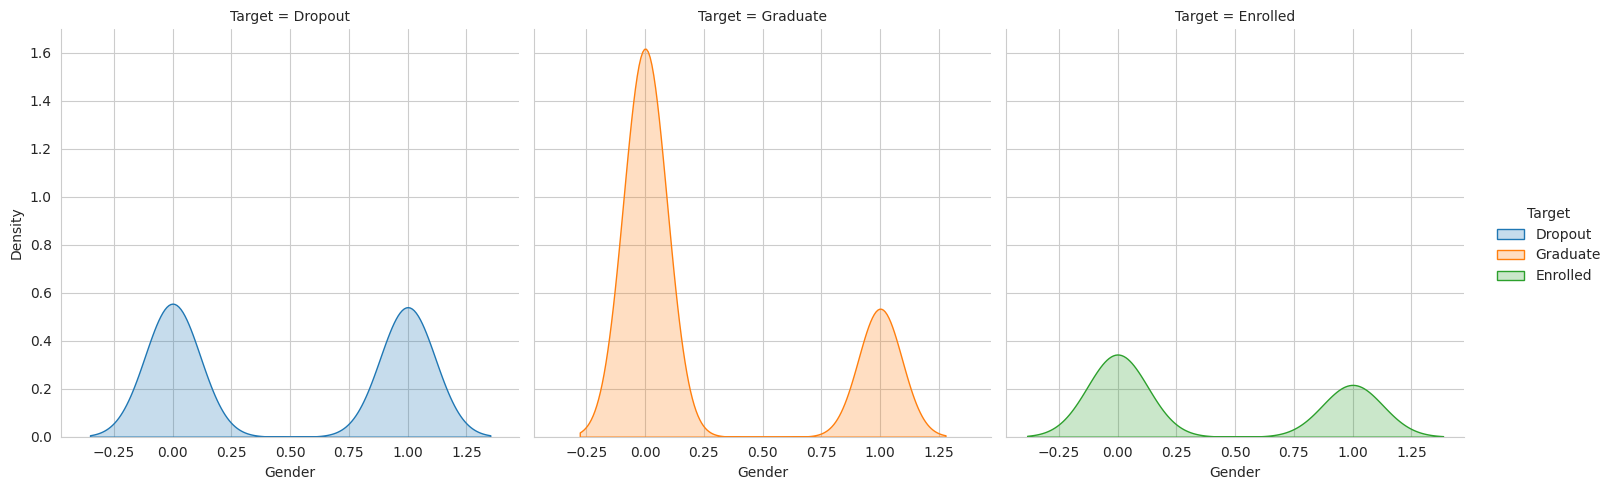

In [26]:
#KDE (Kernel Density Estimate) plot for gender by student status
_ = sns.displot(df, x="Gender", hue="Target", col="Target",
                kind="kde", fill=True)

The **count plot** shows that **males graduate at a higher rate than females**, while dropout rates are slightly higher for females, and fewer females remain enrolled. The **KDE plot** confirms this trend, with a sharper density peak for male graduates, indicating a higher likelihood of completing their studies. Overall, **gender appears to influence academic outcomes**, with females facing a slightly higher dropout risk or delayed graduation, warranting further analysis into factors like scholarships, admission grades, or socio-economic conditions.

# Distribution of age at enrollment

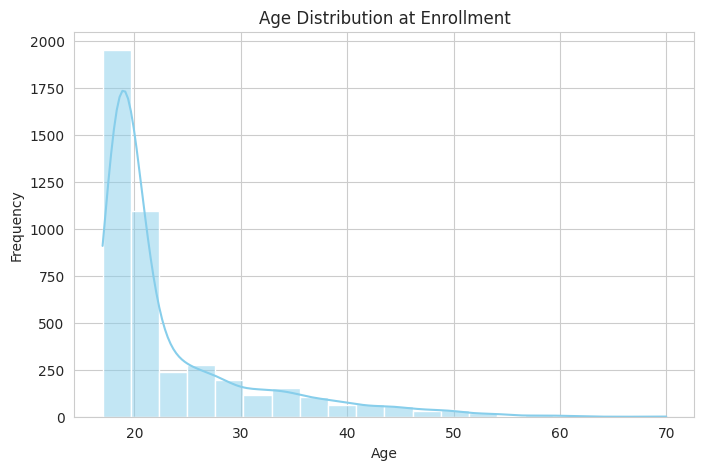

In [28]:
# Histogram to visualize the distribution of students' ages at enrollment
plt.figure(figsize=(8, 5))
sns.histplot(df["Age at enrollment"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution at Enrollment")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The histogram shows that **most students enroll between 18-22 years old**, with a sharp decline in enrollment at older ages. The **right-skewed distribution** suggests that while late enrollments (30+ years) exist, they are uncommon. The **KDE curve confirms a peak at younger ages**, indicating that higher education is primarily pursued early.

# Correlation heatmap of selected numerical features

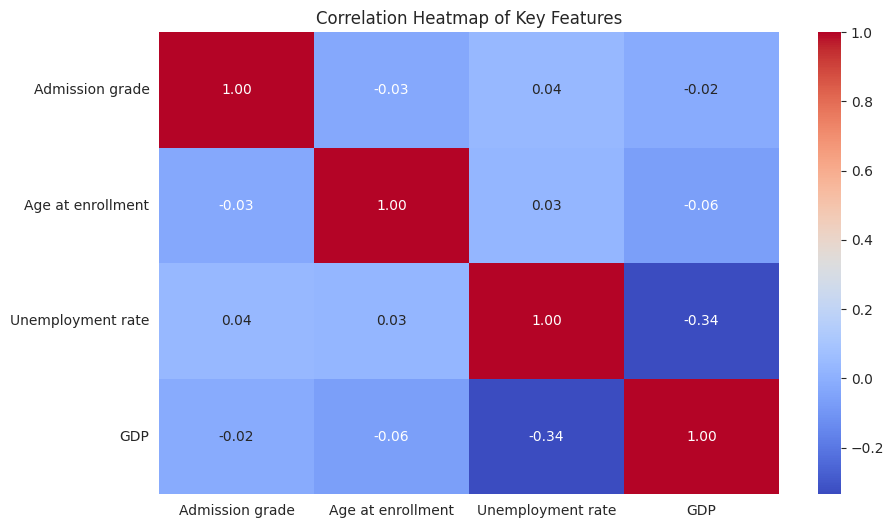

In [39]:
selected_features = ["Admission grade", "Previous qualification grade", "Age at enrollment", "Unemployment rate", "GDP", "Inflation"]

existing_features = [feature for feature in selected_features if feature in df.columns]
plt.figure(figsize=(10, 6))
sns.heatmap(df[existing_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()

Admission grades and student age are largely independent of macroeconomic factors. The strongest relationship is between GDP and unemployment (-0.34), but this is moderate. **Since no strong correlations exist among the features, they likely influence student dropout rates individually rather than through interdependence.**

# Identifying Key Predictors of Student Outcomes using Feature Importance

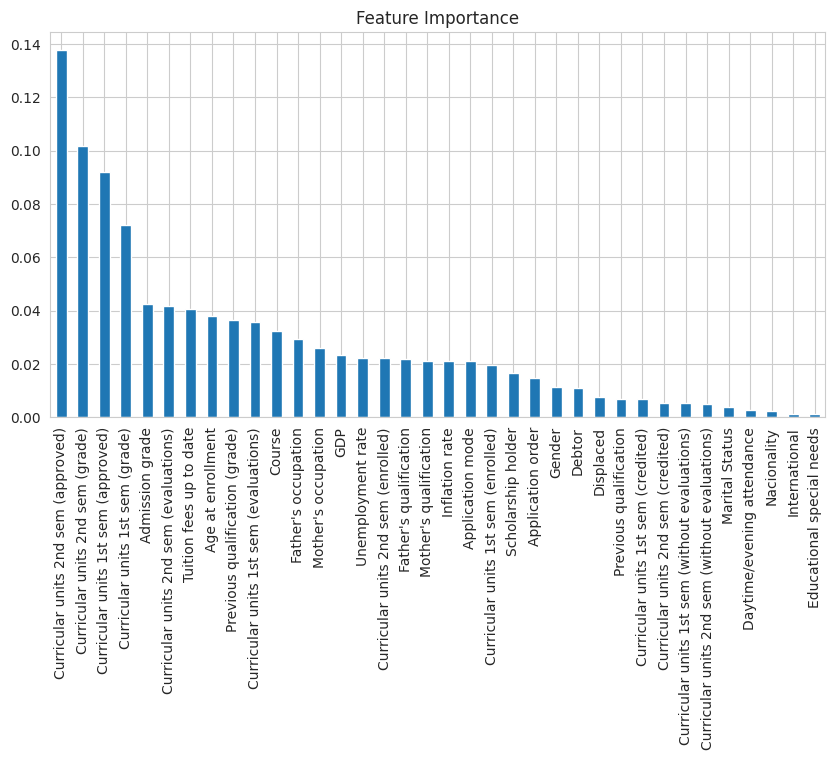

In [40]:
X = df.drop(columns=['Target'])  # Adjust as needed
y = df['Target']
model = RandomForestClassifier()
model.fit(X, y)

feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.show()

The feature importance chart highlights **academic performance** (approved curricular units and grades) as the strongest predictor of student outcomes, but our focus is on scholarship holding and gender, which appear less significant. This discrepancy arises because **scholarship status and gender** likely influence student success indirectly through other variables like academic performance and tuition fees. Since Random Forest prioritizes features that create the most effective splits, semester grades dominate, reducing the relative importance of scholarship holding and gender. However, as our analysis aims to assess their direct impact, we proceed with these variables while excluding semester grades as a predictor to explore their standalone effect on dropout likelihood.

# Estimating the Causal Effect of Scholarships on Student Dropout Using Double Machine Learning (DML)

### **PICO Formulation for Analyzing the Impact of Scholarships and Gender on Student Dropout**  

#### **Population (P):**  
Undergraduate students from various academic programs, differing in **gender, age, prior academic performance, and socio-economic background**. The dataset includes student status categorized as **dropout, enrolled, or graduate**.  

#### **Intervention (I):**  
Receiving a **scholarship** (binary treatment: 1 = scholarship holder, 0 = non-scholarship holder). Scholarships provide **financial aid**, which may help students remain enrolled and complete their degrees.  

#### **Comparison (C):**  
- **Students who receive scholarships vs. those who do not**, while controlling for potential confounders such as **admission grades, tuition fee status, prior academic performance, and economic conditions (GDP, unemployment rate).**  
- **Male vs. female students**, to determine whether the effect of scholarships on dropout rates differs by gender.  

#### **Outcome (O):**  
The likelihood of **dropping out, staying enrolled, or graduating**. The analysis aims to assess:  
1. **Whether scholarships reduce dropout rates overall.**  
2. **If the impact of scholarships varies by gender, indicating potential disparities in financial aid effectiveness.**  

This PICO framework guides the analysis by helping us **quantify the causal effect of scholarships and gender on student success** while accounting for **potential confounders** using **Double Machine Learning (DML).**

**Causal Question:** Does receiving a scholarship reduce the likelihood of a student dropping out, independent of other confounding factors such as prior academic performance, financial stability, and socio-economic background?


/usr/local/lib/python3.11/dist-packages/doubleml/utils/_checks.py:205: UserWarning: Propensity predictions from learner RandomForestClassifier(random_state=42) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'


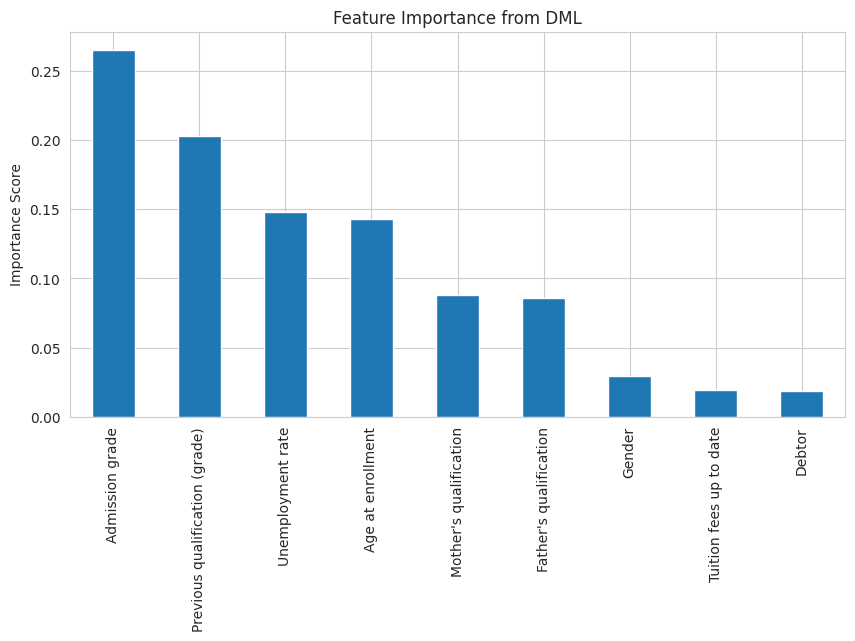

In [48]:
# Define Treatment, Outcome, and Covariates
treatment = "Scholarship holder"  # Binary treatment variable
outcome = "Target"  # Multiclass outcome (Dropout, Graduate, Enrolled)

# Define Potential Confounders
covariates = [
    "Age at enrollment", "Admission grade", "Previous qualification (grade)",
    "Father's qualification", "Mother's qualification", "Unemployment rate",
    "Tuition fees up to date", "Debtor", "Gender"
]

# Drop missing values for simplicity (or handle them properly)
df = df.dropna(subset=[treatment, outcome] + covariates)

# Encode categorical target variable into numeric values (Dropout = 1, Graduate = 0)
df[outcome] = df[outcome].map({'Dropout': 1, 'Enrolled': 2, 'Graduate': 0})

# Split Data into Training and Test Set
X = df[covariates]
T = df[treatment]
Y = df[outcome]

# Standardize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets (to fit the model before using it)
X_train, X_test, T_train, T_test = train_test_split(X_scaled, T, test_size=0.2, random_state=42)

# Fit the RandomForest model for treatment (this step was missing)
ml_m = RandomForestClassifier(n_estimators=100, random_state=42)
ml_m.fit(X_train, T_train)  # ✅ Now, we explicitly fit the model before extracting feature importance

ml_l = LassoCV(cv=5)  # Lasso Regression for outcome model
data = dml.DoubleMLData.from_arrays(X_scaled, Y, T)
# DML Model (Partialling Out Treatment Effect)
dml_model = dml.DoubleMLPLR(data, ml_l, ml_m)
dml_model.fit()


# Extract Feature Importance (from Random Forest Treatment Model)
feature_importance = pd.Series(
    ml_m.feature_importances_,
    index=covariates
).sort_values(ascending=False)

# Plot Feature Importance
import matplotlib.pyplot as plt
feature_importance.plot(kind='bar', figsize=(10, 5), title="Feature Importance from DML")
plt.ylabel("Importance Score")
plt.show()


In [49]:
print(f"Estimated Treatment Effect: {dml_model.coef}")
print(f"Standard Error: {dml_model.se}")

Estimated Treatment Effect: [-0.29582767]
Standard Error: [0.02667642]


#Gender-Based Analysis on Student Dropout Using Double Machine Learning

Does the impact of receiving a scholarship on student dropout likelihood differ between male and female students?

In [50]:
# Split dataset by gender
df_male = df[df["Gender"] == 0]
df_female = df[df["Gender"] == 1]

# Run the DML model separately for each subgroup
def run_dml_analysis(df_subset):
    X_sub = df_subset[covariates]
    T_sub = df_subset[treatment]
    Y_sub = df_subset[outcome]

    X_sub_scaled = scaler.fit_transform(X_sub)
    data_sub = dml.DoubleMLData.from_arrays(X_sub_scaled, Y_sub, T_sub)

    ml_l = LassoCV(cv=5)
    ml_m = RandomForestRegressor(n_estimators=100, random_state=42)

    dml_model = dml.DoubleMLPLR(data_sub, ml_l, ml_m)
    dml_model.fit()

    return dml_model.coef, dml_model.se

# Estimate treatment effects for each group
effect_male, se_male = run_dml_analysis(df_male)
effect_female, se_female = run_dml_analysis(df_female)

print(f"Treatment Effect (Males): {effect_male} ± {se_male}")
print(f"Treatment Effect (Females): {effect_female} ± {se_female}")

Treatment Effect (Males): [-0.29901342] ± [0.02985344]
Treatment Effect (Females): [-0.24503646] ± [0.05548153]
